<a href="https://colab.research.google.com/github/apoorvavinod46/The-Sparks-Foundation-Internship/blob/main/Task8_Timeline_Analysis_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**
**#GRIPMAY21**

**Author: APOORVA VINOD, DATA SCIENCE & BUSINESS ANALYTICS INTERN**



**Task-7 Stock Market Prediction using Numerical and Textual Analysis (Level - Advanced)**

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

Dataset: https://bit.ly/30d2gdi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

**Importing Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("/content/owid-covid-data.csv")

In [ ]:

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.985100e+04,19851.000000,19619.000000,18336.000000,18359.000000,19619.000000,19851.000000,19851.00000,19619.000000,18336.000000,18359.000000,19619.000000,16973.000000,1889.000000,1889.000000,2272.000000,2272.000000,19.000000,19.000000,151.000000,151.000000,7.632000e+03,7.792000e+03,7792.000000,7632.000000,8876.000000,8876.000000,8612.000000,8573.000000,2.354000e+03,2.153000e+03,1.566000e+03,1.994000e+03,3.936000e+03,2354.000000,2153.000000,1566.000000,3936.000000,17718.000000,2.035200e+04,19342.000000,18655.000000,18655.000000,18654.000000,18432.000000,11853.000000,19114.000000,19341.000000,14322.000000,14322.000000,10283.000000,16873.000000,19419.000000,19001.000000
mean,5.640251e+05,3996.294796,3953.996483,12908.045921,80.017376,73.464584,10786.628375,72.96129,72.975983,244.079944,1.521918,1.409270,0.992988,309.874537,25.384944,1651.188380,182.422372,3.478105,3.971000,722.846530,104.882980,1.987351e+04,2.755661e+06,227.888013,1.738097,18894.209216,1.739158,0.116947,255.759956,1.826618e+07,6.579648e+06,2.791967e+06,5.435107e+05,2.805081e+05,13.606054,10.675114,4.843985,2819.881352,58.170444,1.922289e+08,181.120371,30.727617,8.671020,5.516601,17091.396643,12.553573,248.384406,7.792364,11.042438,33.268475,49.591705,3.076389,73.010627,0.723719
std,2.805539e+06,22857.202134,22143.922317,50908.150991,329.020882,301.772937,20611.223791,161.48220,137.740513,425.703912,3.875883,2.973686,0.348130,337.482766,29.456548,1956.061558,261.646160,4.253749,4.856281,916.602084,131.449964,5.135714e+04,5.370385e+06,411.989643,5.370131,36710.523559,3.672111,0.115289,1192.406648,7.109187e+07,2.536198e+07,9.182184e+06,1.938467e+06,1.239423e+06,19.383662,14.247475,8.199856,5769.597981,22.581049,7.471759e+08,356.886083,8.918416,5.709659,3.876559,16110.812701,18.681331,112.319678,3.544584,11.202377,13.147689,33.513202,2.288229,8.008985,0.148535
min,1.000000e+00,-209.000000,-29.143000,1.000000,-117.000000,-14.429000,0.001000,-19.40900,-2.404000,0.001000,-10.095000,-1.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986000,1.126000,0.000000,0.000000,-7.549300e+04,0.000000e+00,0.000000,-23.010000,0.000000,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.500200e+04,3.202000,16.700000,1.000000,1.337000,661.240000,0.200000,105.599000,0.990000,0.300000,12.300000,2.735000,0.400000,53.280000,0.397000
25%,9.630000e+02,2.000000,8.857000,44.000000,0.000000,0.000000,221.974000,0.08250,1.296000,6.857000,0.000000,0.000000,0.830000,33.000000,3.538000,218.000000,24.304500,0.986000,1.126000,34.523000,10.092500,1.616750e+03,1.616048e+05,17.664250,0.232750,1678.250000,0.286000,0.027000,5.500000,7.485075e+04,6.371500e+04,5.578100e+04,4.353000e+03,6.770000e+02,1.102500,0.900000,0.340000,301.750000,42.590000,2.351625e+06,21.188000,25.000000,3.655000,2.242000,3645.070000,0.7000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               20352 non-null  object 
 1   continent                              19420 non-null  object 
 2   location                               20352 non-null  object 
 3   date                                   20352 non-null  object 
 4   total_cases                            19851 non-null  float64
 5   new_cases                              19851 non-null  float64
 6   new_cases_smoothed                     19619 non-null  float64
 7   total_deaths                           18336 non-null  float64
 8   new_deaths                             18359 non-null  float64
 9   new_deaths_smoothed                    19619 non-null  float64
 10  total_cases_per_million                19851 non-null  float64
 11  ne

In [ ]:
df.shape

(20352, 59)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 59)


In [ ]:

df.count()

iso_code                                 20352
continent                                19420
location                                 20352
date                                     20352
total_cases                              19851
new_cases                                19851
new_cases_smoothed                       19619
total_deaths                             18336
new_deaths                               18359
new_deaths_smoothed                      19619
total_cases_per_million                  19851
new_cases_per_million                    19851
new_cases_smoothed_per_million           19619
total_deaths_per_million                 18336
new_deaths_per_million                   18359
new_deaths_smoothed_per_million          19619
reproduction_rate                        16973
icu_patients                              1889
icu_patients_per_million                  1889
hosp_patients                             2272
hosp_patients_per_million                 2272
weekly_icu_ad

**Checking the Missing or Null values**


In [ ]:
print(df.isnull().sum())

iso_code                                     0
continent                                  932
location                                     0
date                                         0
total_cases                                501
new_cases                                  501
new_cases_smoothed                         733
total_deaths                              2016
new_deaths                                1993
new_deaths_smoothed                        733
total_cases_per_million                    501
new_cases_per_million                      501
new_cases_smoothed_per_million             733
total_deaths_per_million                  2016
new_deaths_per_million                    1993
new_deaths_smoothed_per_million            733
reproduction_rate                         3379
icu_patients                             18463
icu_patients_per_million                 18463
hosp_patients                            18080
hosp_patients_per_million                18080
weekly_icu_ad

In [ ]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN


In [ ]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-11-16,7285.0,107.0,40.0,7830.0,545485.0
2020-11-17,7513.0,228.0,40.0,11582.0,557067.0
2020-11-18,7711.0,198.0,41.0,10098.0,567165.0
2020-11-19,7979.0,268.0,41.0,12405.0,579570.0
2020-11-20,8211.0,232.0,43.0,12077.0,591647.0


Text(0.5, 0, 'Month')

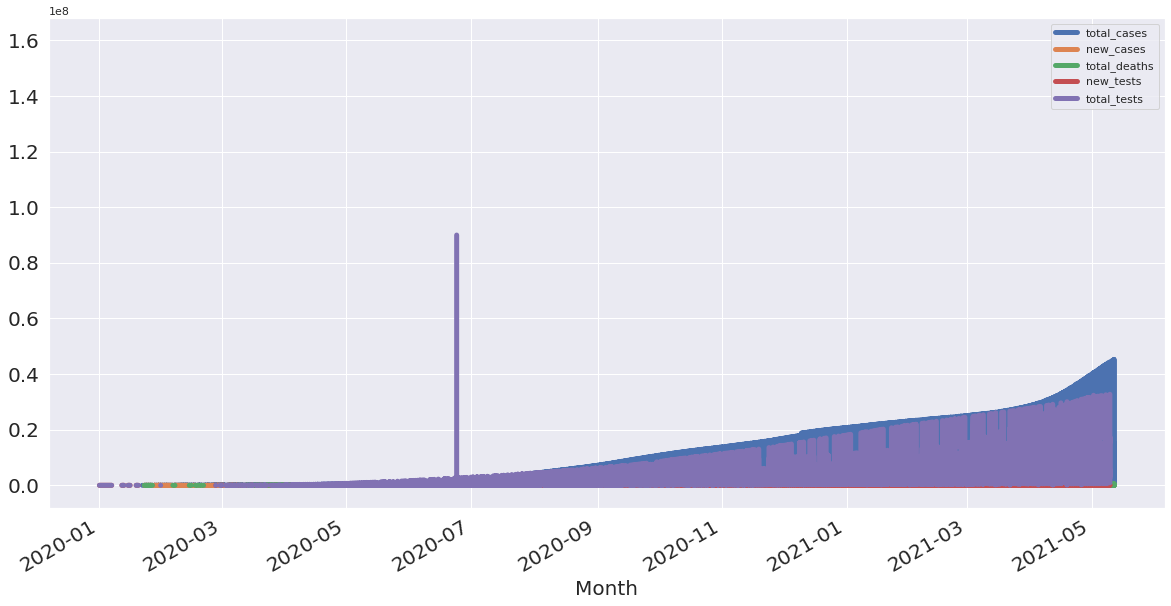

In [ ]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

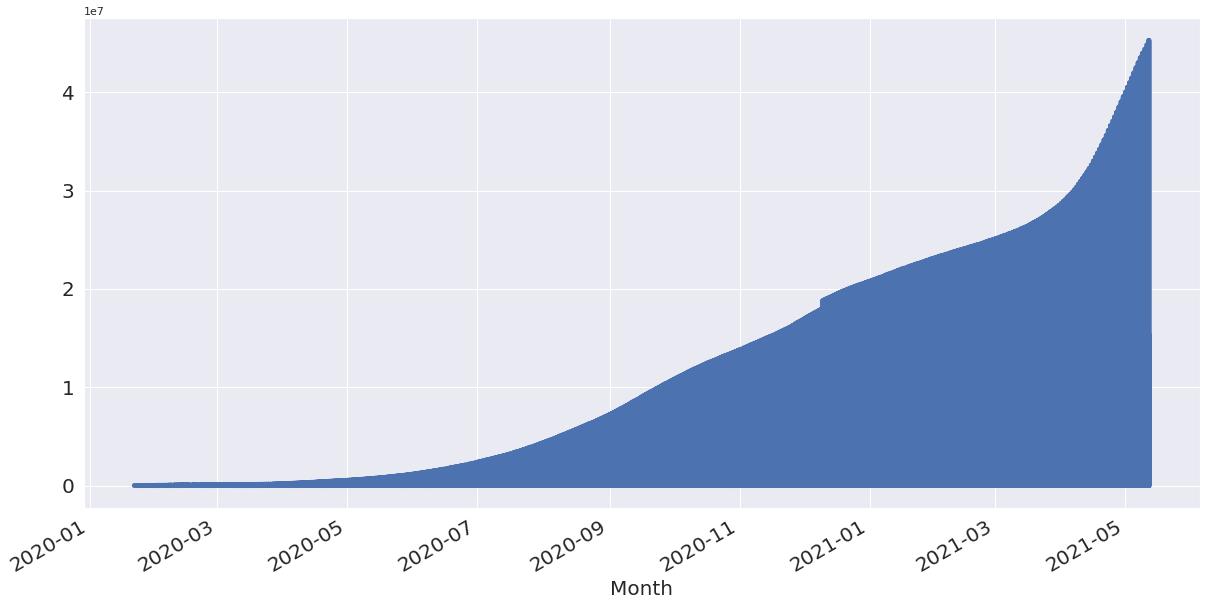

In [ ]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

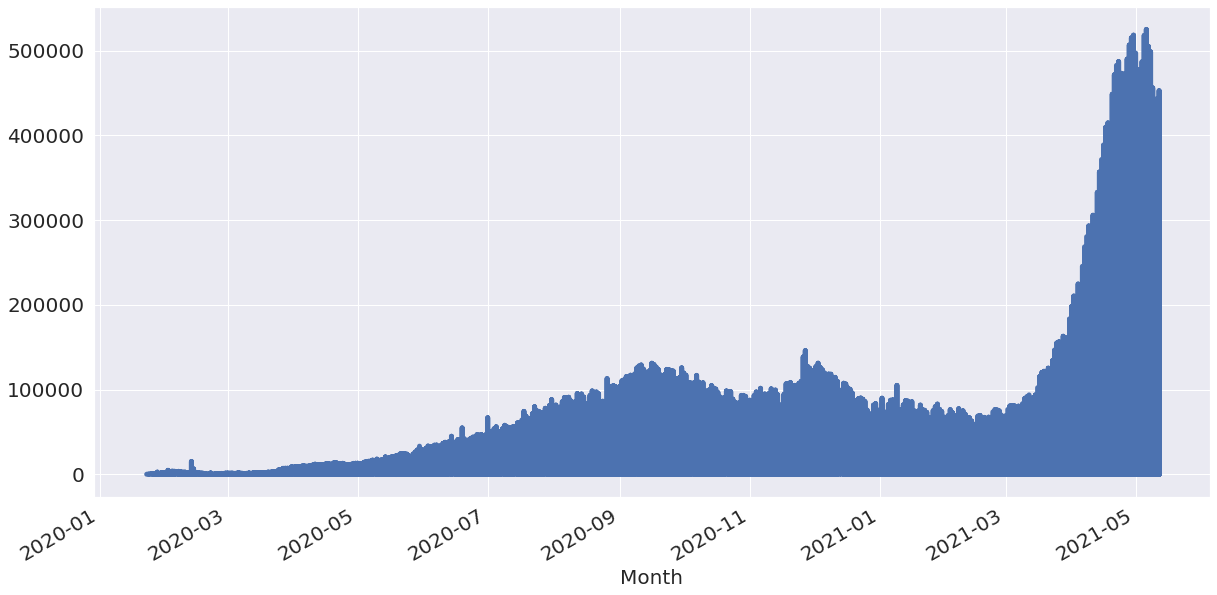

In [ ]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

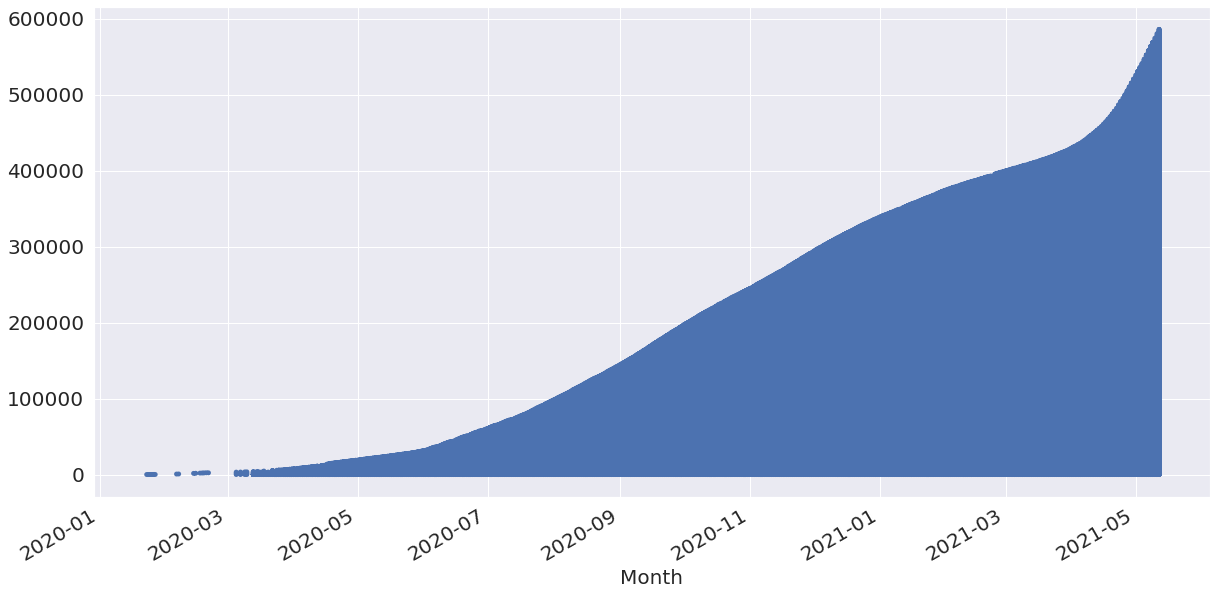

In [ ]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

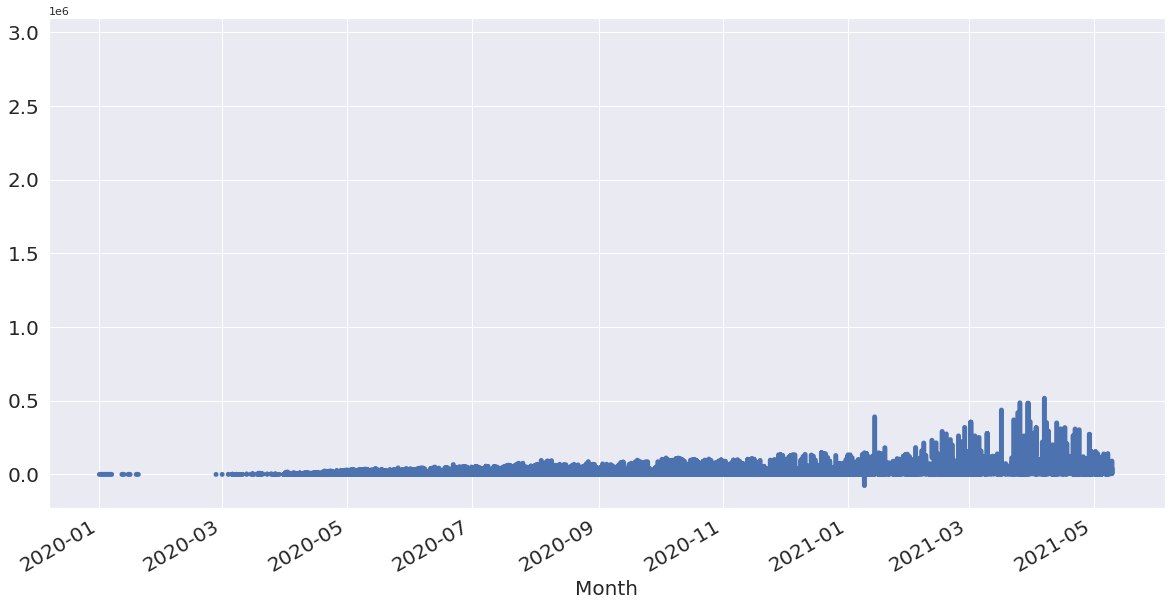

In [ ]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

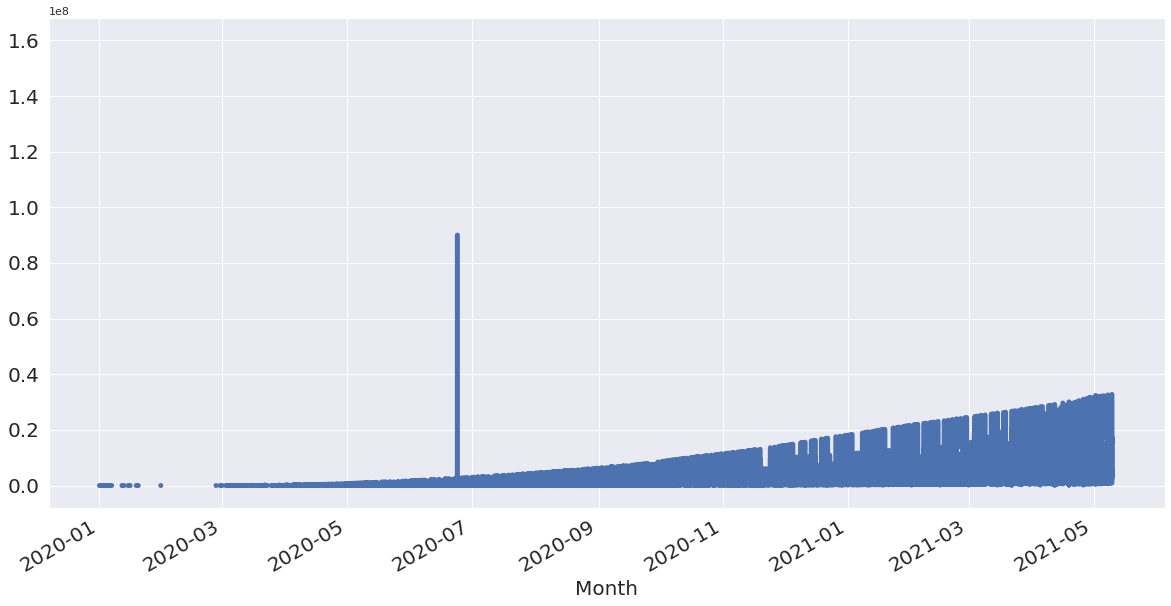

In [ ]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

**Trends and Seasonality in TimeSeries Data**

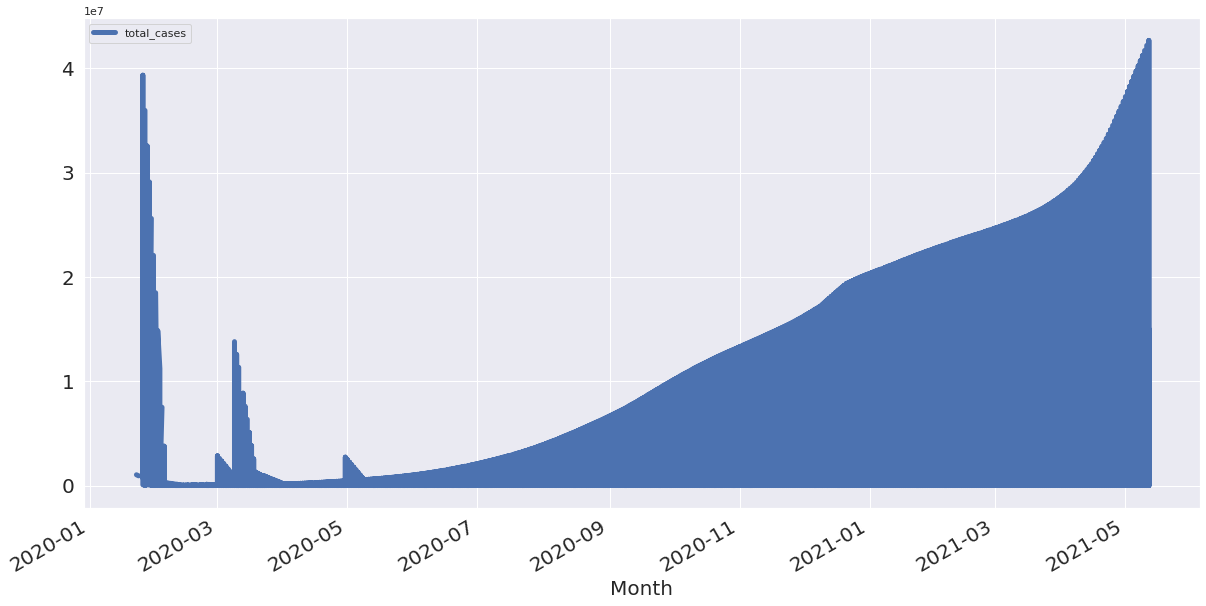

In [ ]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

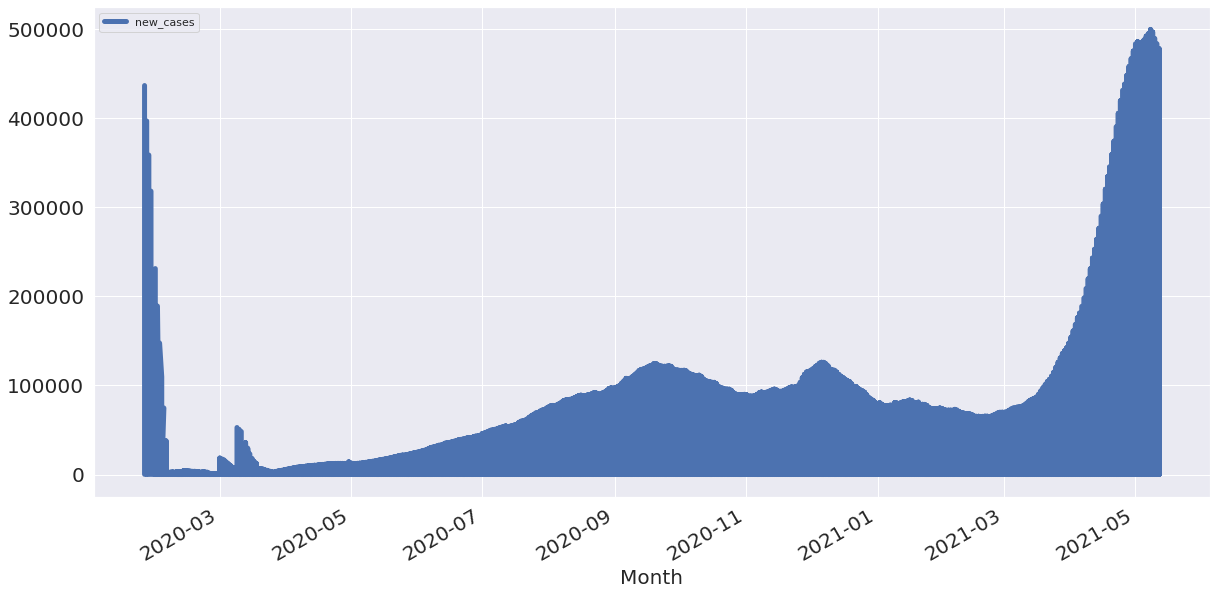

In [ ]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

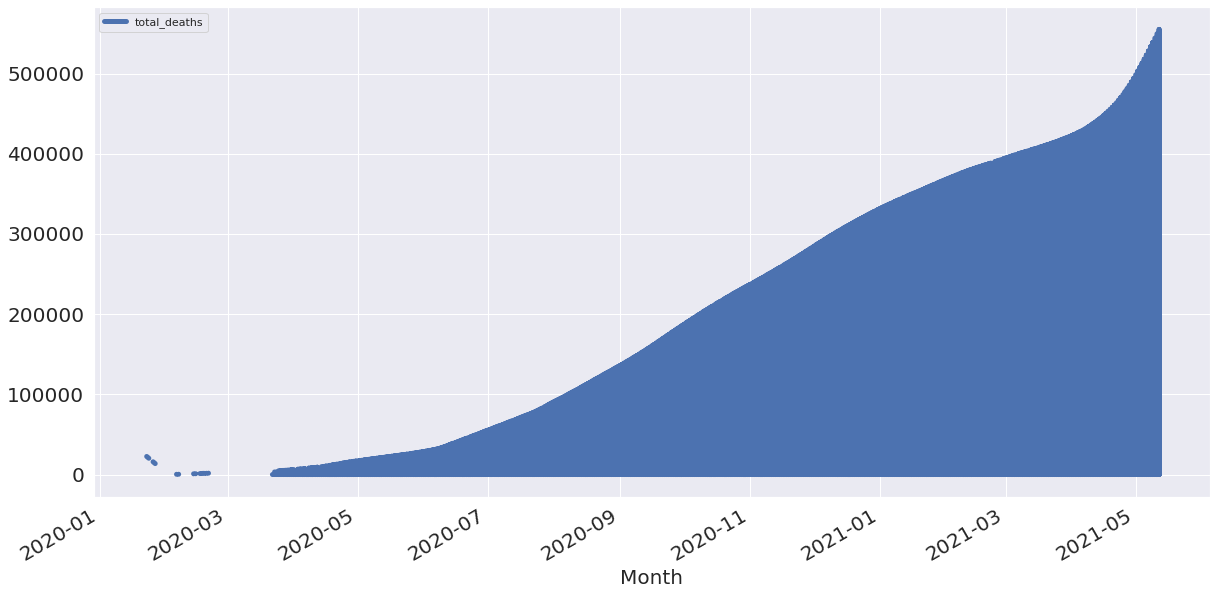

In [ ]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


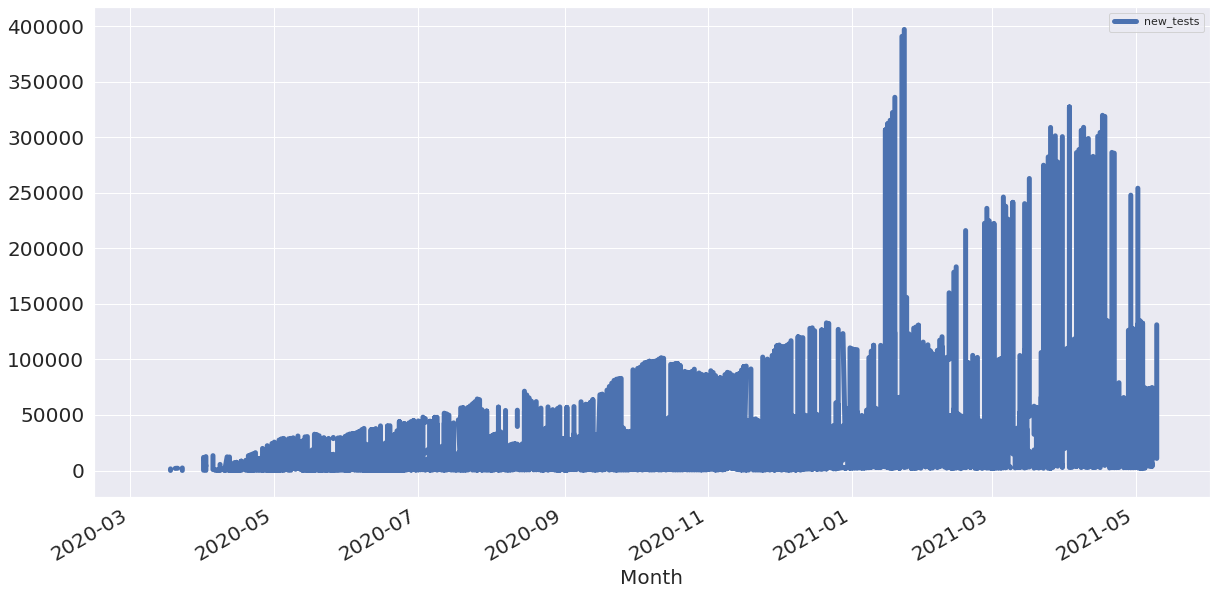

In [ ]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

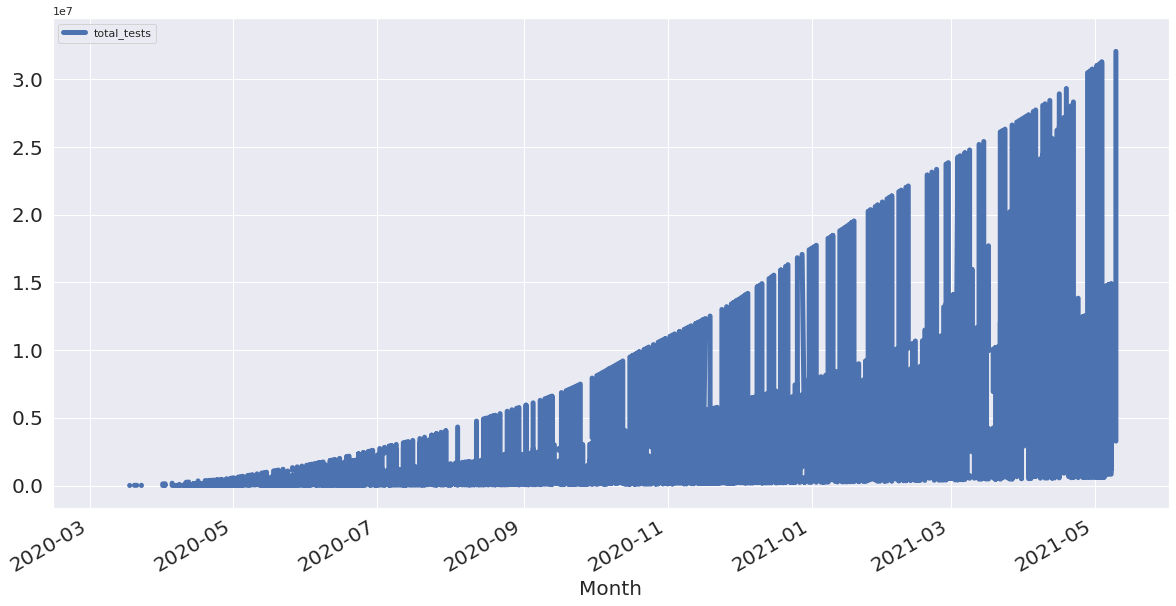

In [ ]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

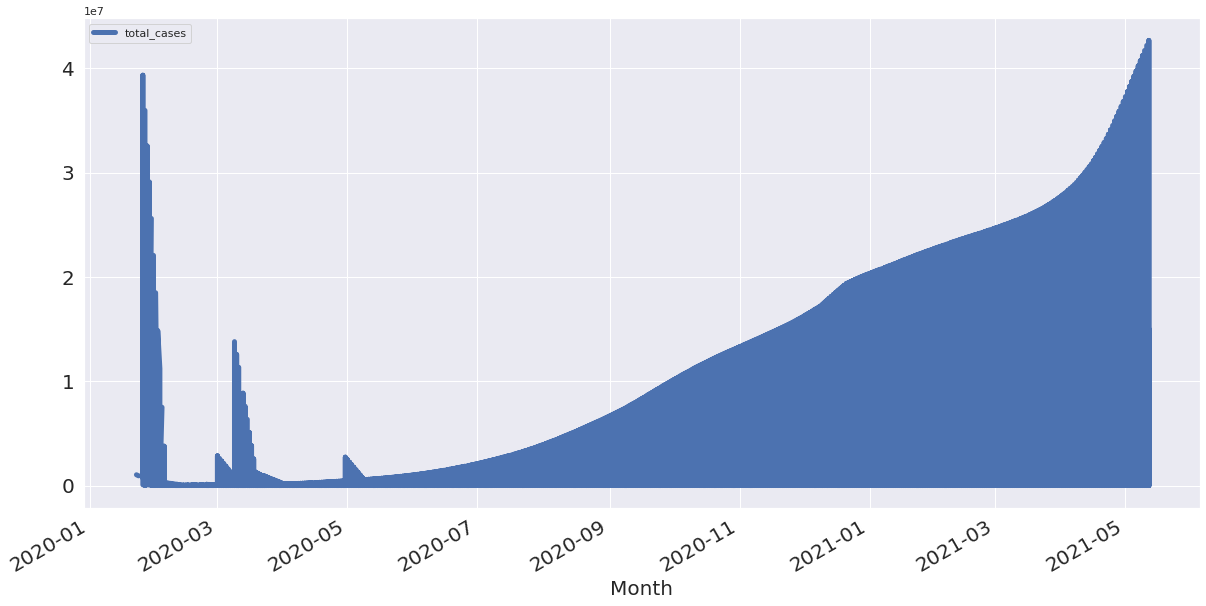

In [ ]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);
